# 1 Machine Learning

Specifically analyze which species can represent the characteristics of a certain population using machine learning.

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2 Load Data

In [2]:
# load the datasets
archaea = pd.read_csv("Archaea.csv")
bacteria = pd.read_csv("Bacteria.csv")
fungus = pd.read_csv("fungus.csv")
virus = pd.read_csv("virus.csv")

In [3]:
#backup
df_fungus = fungus.copy(deep=True)

# set the 'name' column as the index
df_fungus = fungus.set_index("ASV")

df_fungus.head(7)

,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,SUM,Percent,...,p8,c13,pm2,c3,pm4,pm5,pm6,pm7,pm8,pm9
ASV,,,,,,,,,,,,,,,,,,,,,
ASV413,d__Eukaryota,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetales_fam_Incertae_sedis,g__Candida,s__Candida_albicans,95969,0.054853,...,0,0,0,0,0,0,0,0,0,0
ASV970,d__Eukaryota,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetales_fam_Incertae_sedis,g__Candida,s__Candida_albicans,2882,0.001647,...,0,0,0,0,0,0,0,0,0,0
ASV11,d__Eukaryota,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Aspergillus,s__unclassified_g__Aspergillus,89015,0.050879,...,1814,698,789,13,1266,451,1247,134,1132,613
ASV1,d__Eukaryota,k__Fungi,p__Basidiomycota,c__Tremellomycetes,o__Trichosporonales,f__Trichosporonaceae,g__Apiotrichum,s__unclassified_g__Apiotrichum,573839,0.327992,...,8155,2779,12386,3655,12088,9760,14581,13921,15390,16039
ASV3,d__Eukaryota,k__Fungi,p__Basidiomycota,c__Tremellomycetes,o__Tremellales,f__Tremellaceae,g__Cryptococcus_f__Tremellaceae,s__Cryptococcus_cyanovorans,177670,0.101552,...,6658,1494,6101,1860,5264,6783,6931,5940,3258,3280
ASV29,d__Eukaryota,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Monascus,s__unclassified_g__Monascus,16688,0.009538,...,1086,71,635,0,113,0,253,0,317,0
ASV194,d__Eukaryota,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetales_fam_Incertae_sedis,g__Candida,s__Candida_parapsilosis,65422,0.037394,...,966,3533,785,481,1496,1956,0,921,0,66


# 3 Data Cleaning
* Check for missing values and outliers, and remove or impute them as necessary. 
* Check for duplicated rows, and remove them if applicable.

###  missing values

>no columns with missing values

# 4 Data Exploration
* descriptive

In [4]:
import warnings
warnings.filterwarnings("ignore")

# display basic statistics of the abundance data
df_fungus.describe()

,SUM,Percent,P12,C2,Pm3,C4,C5,C6,C7,P1,...,p8,c13,pm2,c3,pm4,pm5,pm6,pm7,pm8,pm9
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,...,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000
mean,1024.327869,0.000585,21.626464,18.642272,20.207260,16.758197,22.153981,17.234778,16.964286,17.160422,...,31.566745,16.317330,18.617096,11.672131,19.046253,16.846019,21.888173,18.618852,17.018150,19.040984
std,15062.243909,0.008609,387.657163,191.001128,373.448794,207.161296,249.303050,176.549783,259.901992,473.604970,...,295.309153,172.838768,341.683205,204.335244,331.236116,295.256921,405.601751,371.586345,383.704519,400.371603
min,2.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.500000,0.000038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,196.250000,0.000112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,573839.000000,0.327992,12133.000000,5620.000000,14867.000000,6881.000000,5951.000000,4542.000000,9802.000000,19108.000000,...,8155.000000,3631.000000,12386.000000,7230.000000,12088.000000,9760.000000,14581.000000,13921.000000,15390.000000,16039.000000


### EDA

#### Species vs pm4

In [5]:
# df = df_fungus[["ASV", "Species", "pm4"]]
# df2 = df[df["pm4"]== 0]
# set_0 = set(df2.Species)
# df3 = df[df["pm4"]!= 0]
# set_1 = set(df3.Species)
# df2

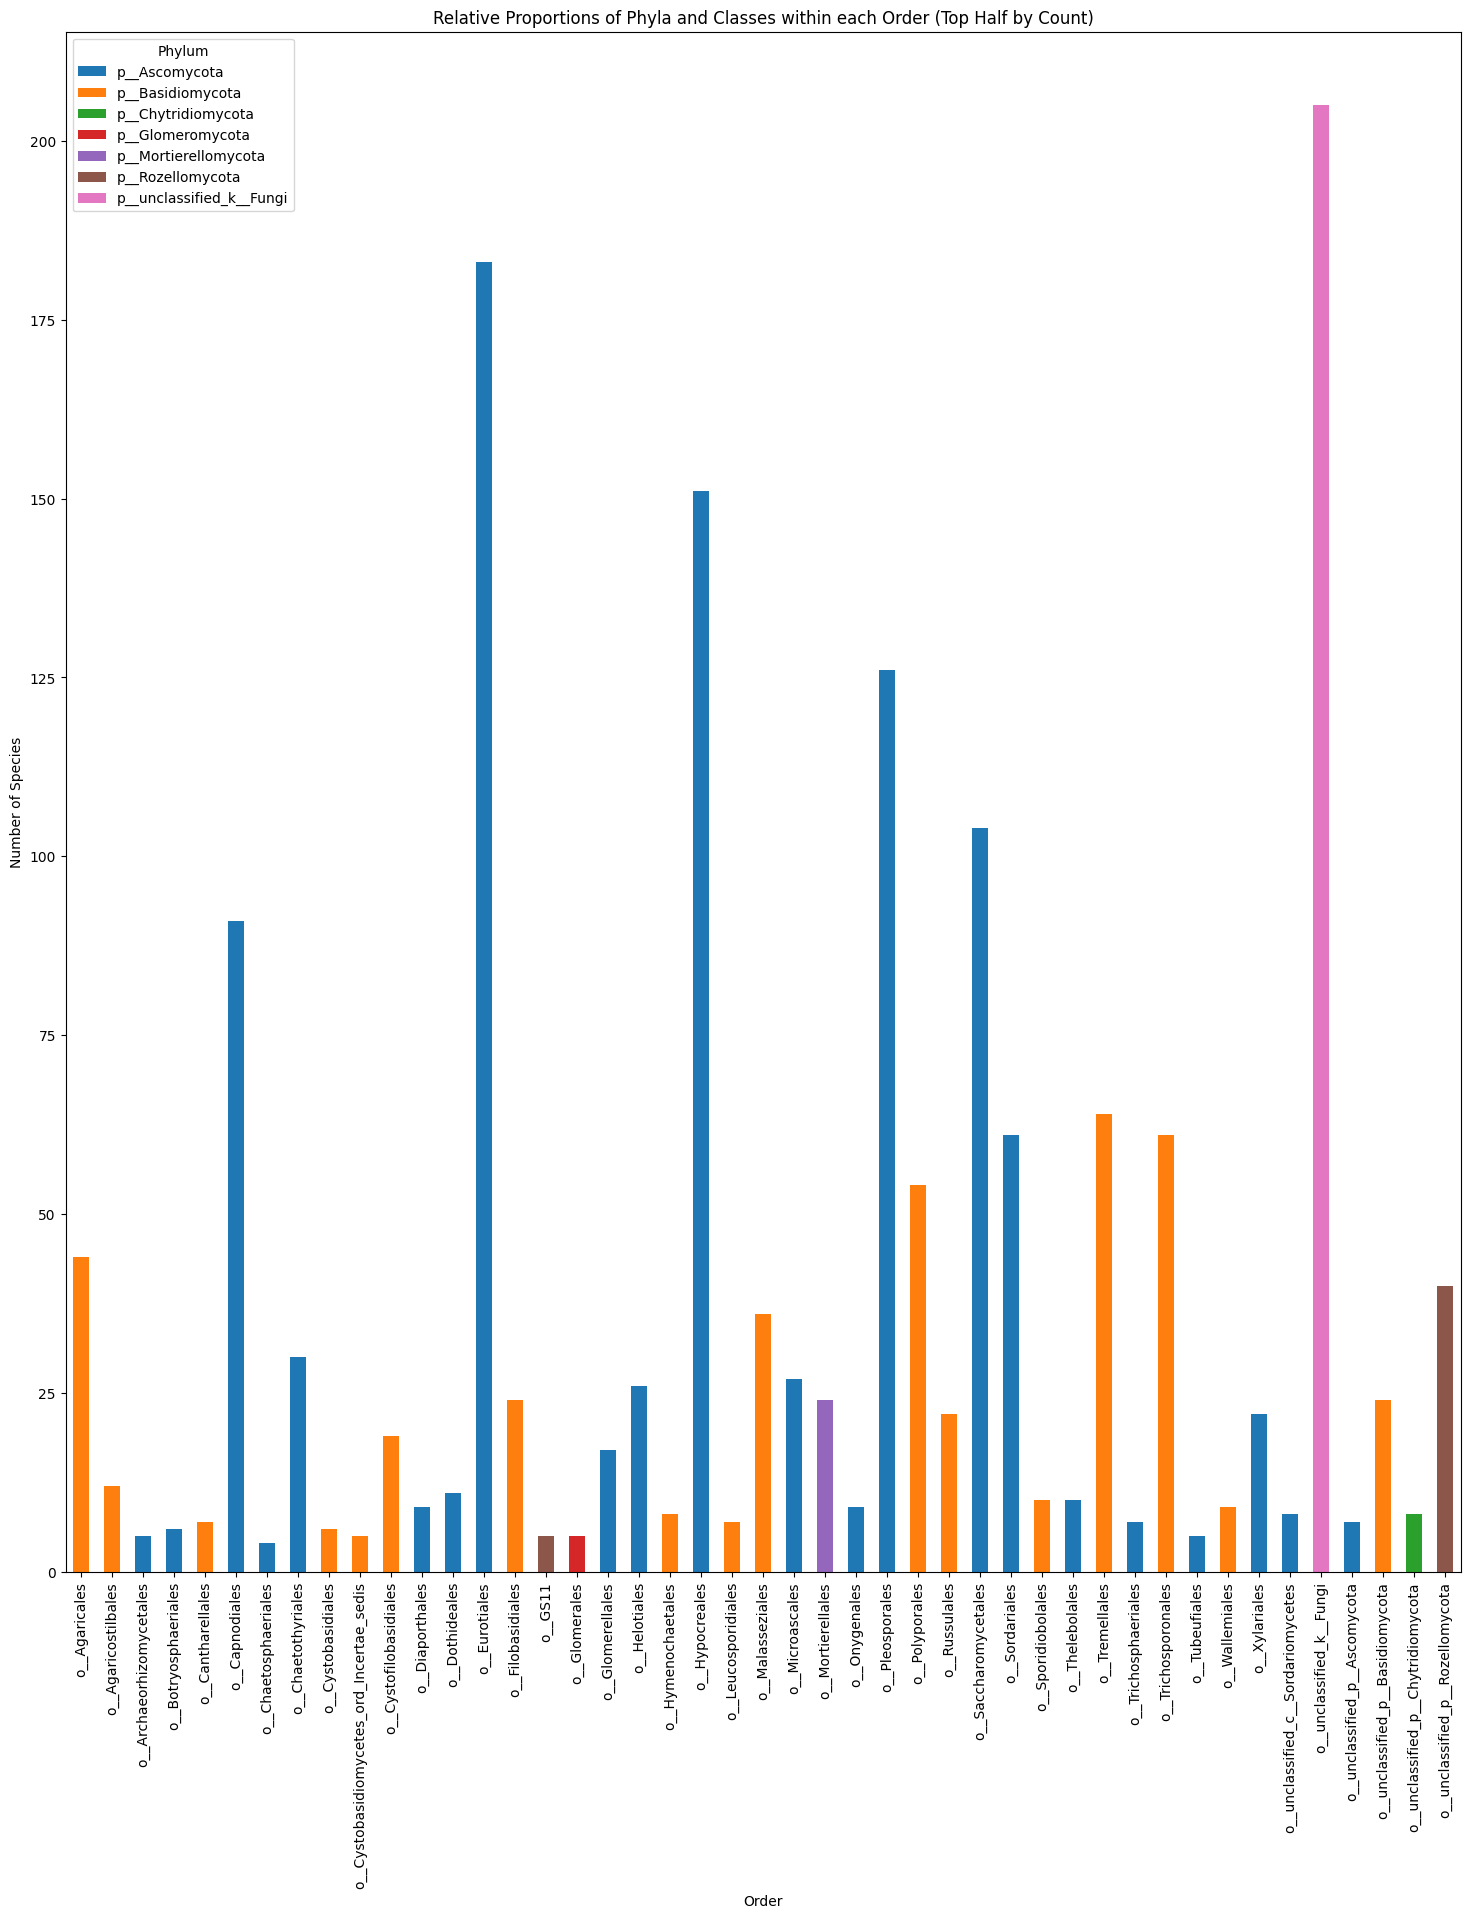

In [6]:
# calculate total count for each order
order_counts = df_fungus.groupby('Order')['Class'].count()
order_counts = order_counts.sort_values(ascending=False)  # sort in descending order

# select the top half of orders by count
num_orders = len(order_counts)
top_orders = order_counts[:num_orders//2]

# create the stacked bar chart for the top orders
df_fungus_ordered = df_fungus[df_fungus['Order'].isin(top_orders.index)]
df_fungus_ordered.groupby(['Order', 'Phylum'])['Class'].count().unstack().plot(kind='bar', 
                                                                               stacked=True, figsize=(18, 20))

# add labels and title
plt.xlabel('Order')
plt.ylabel('Number of Species')
plt.title('Relative Proportions of Phyla and Classes within each Order (Top Half by Count)')

# show plot
plt.show()


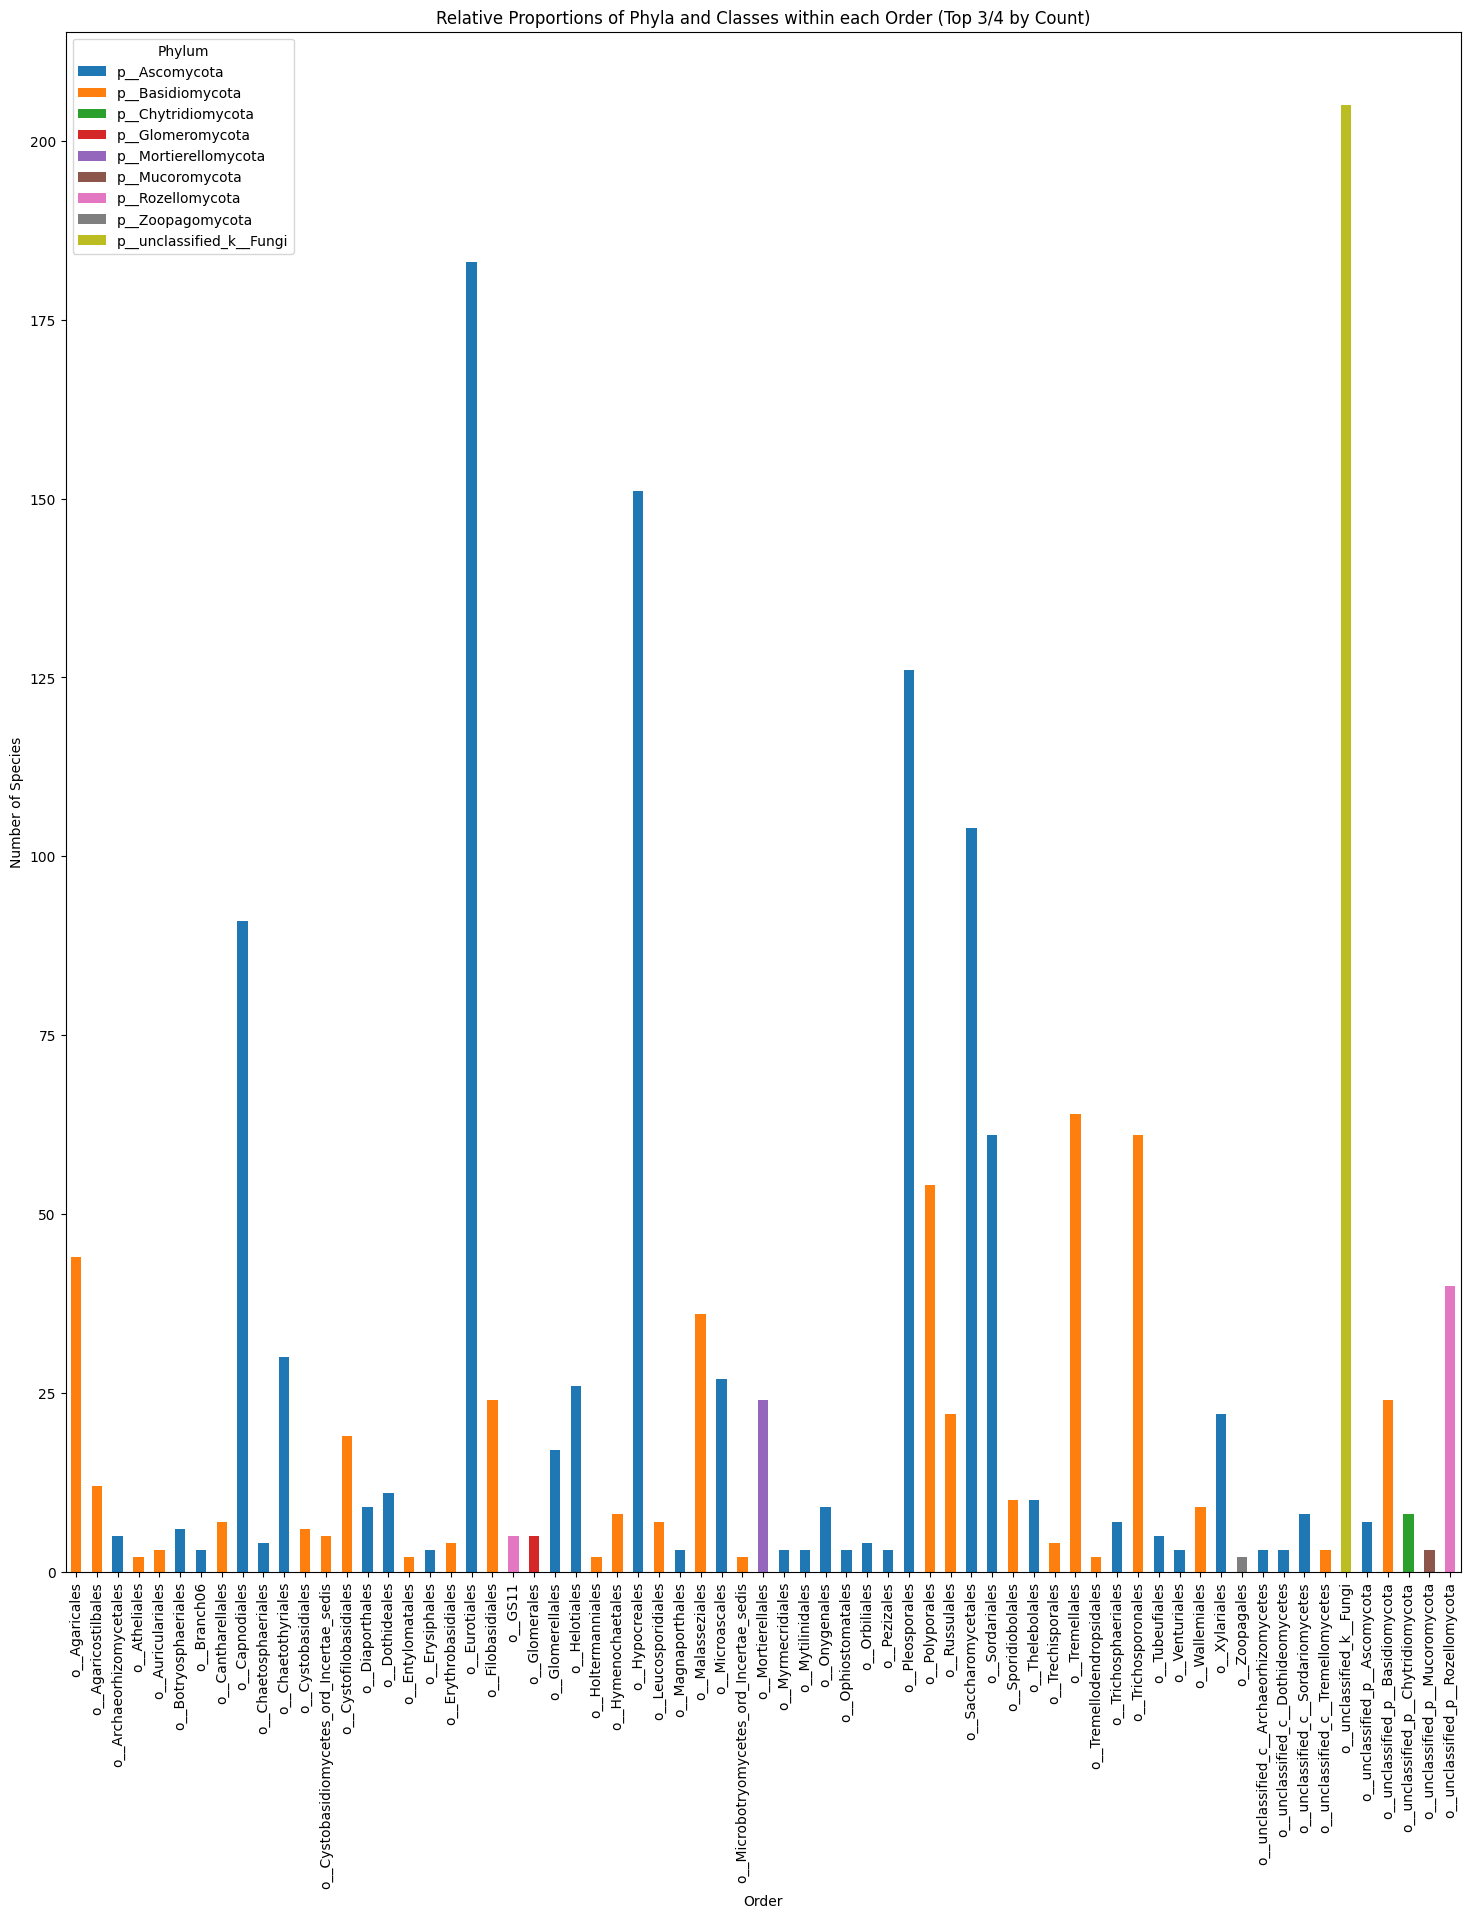

In [7]:
# calculate total count for each order
order_counts = df_fungus.groupby('Order')['Class'].count()
order_counts = order_counts.sort_values(ascending=False)  # sort in descending order

# select the top 3/4 of orders by count
num_orders = len(order_counts)
top_orders = order_counts[:int(num_orders*3/4)]

# create the stacked bar chart for the top orders
df_fungus_ordered = df_fungus[df_fungus['Order'].isin(top_orders.index)]
df_fungus_ordered.groupby(['Order', 'Phylum'])['Class'].count().unstack().plot(kind='bar', stacked=True, figsize=(18, 20))

# add labels and title
plt.xlabel('Order')
plt.ylabel('Number of Species')
plt.title('Relative Proportions of Phyla and Classes within each Order (Top 3/4 by Count)')

# show plot
plt.show()


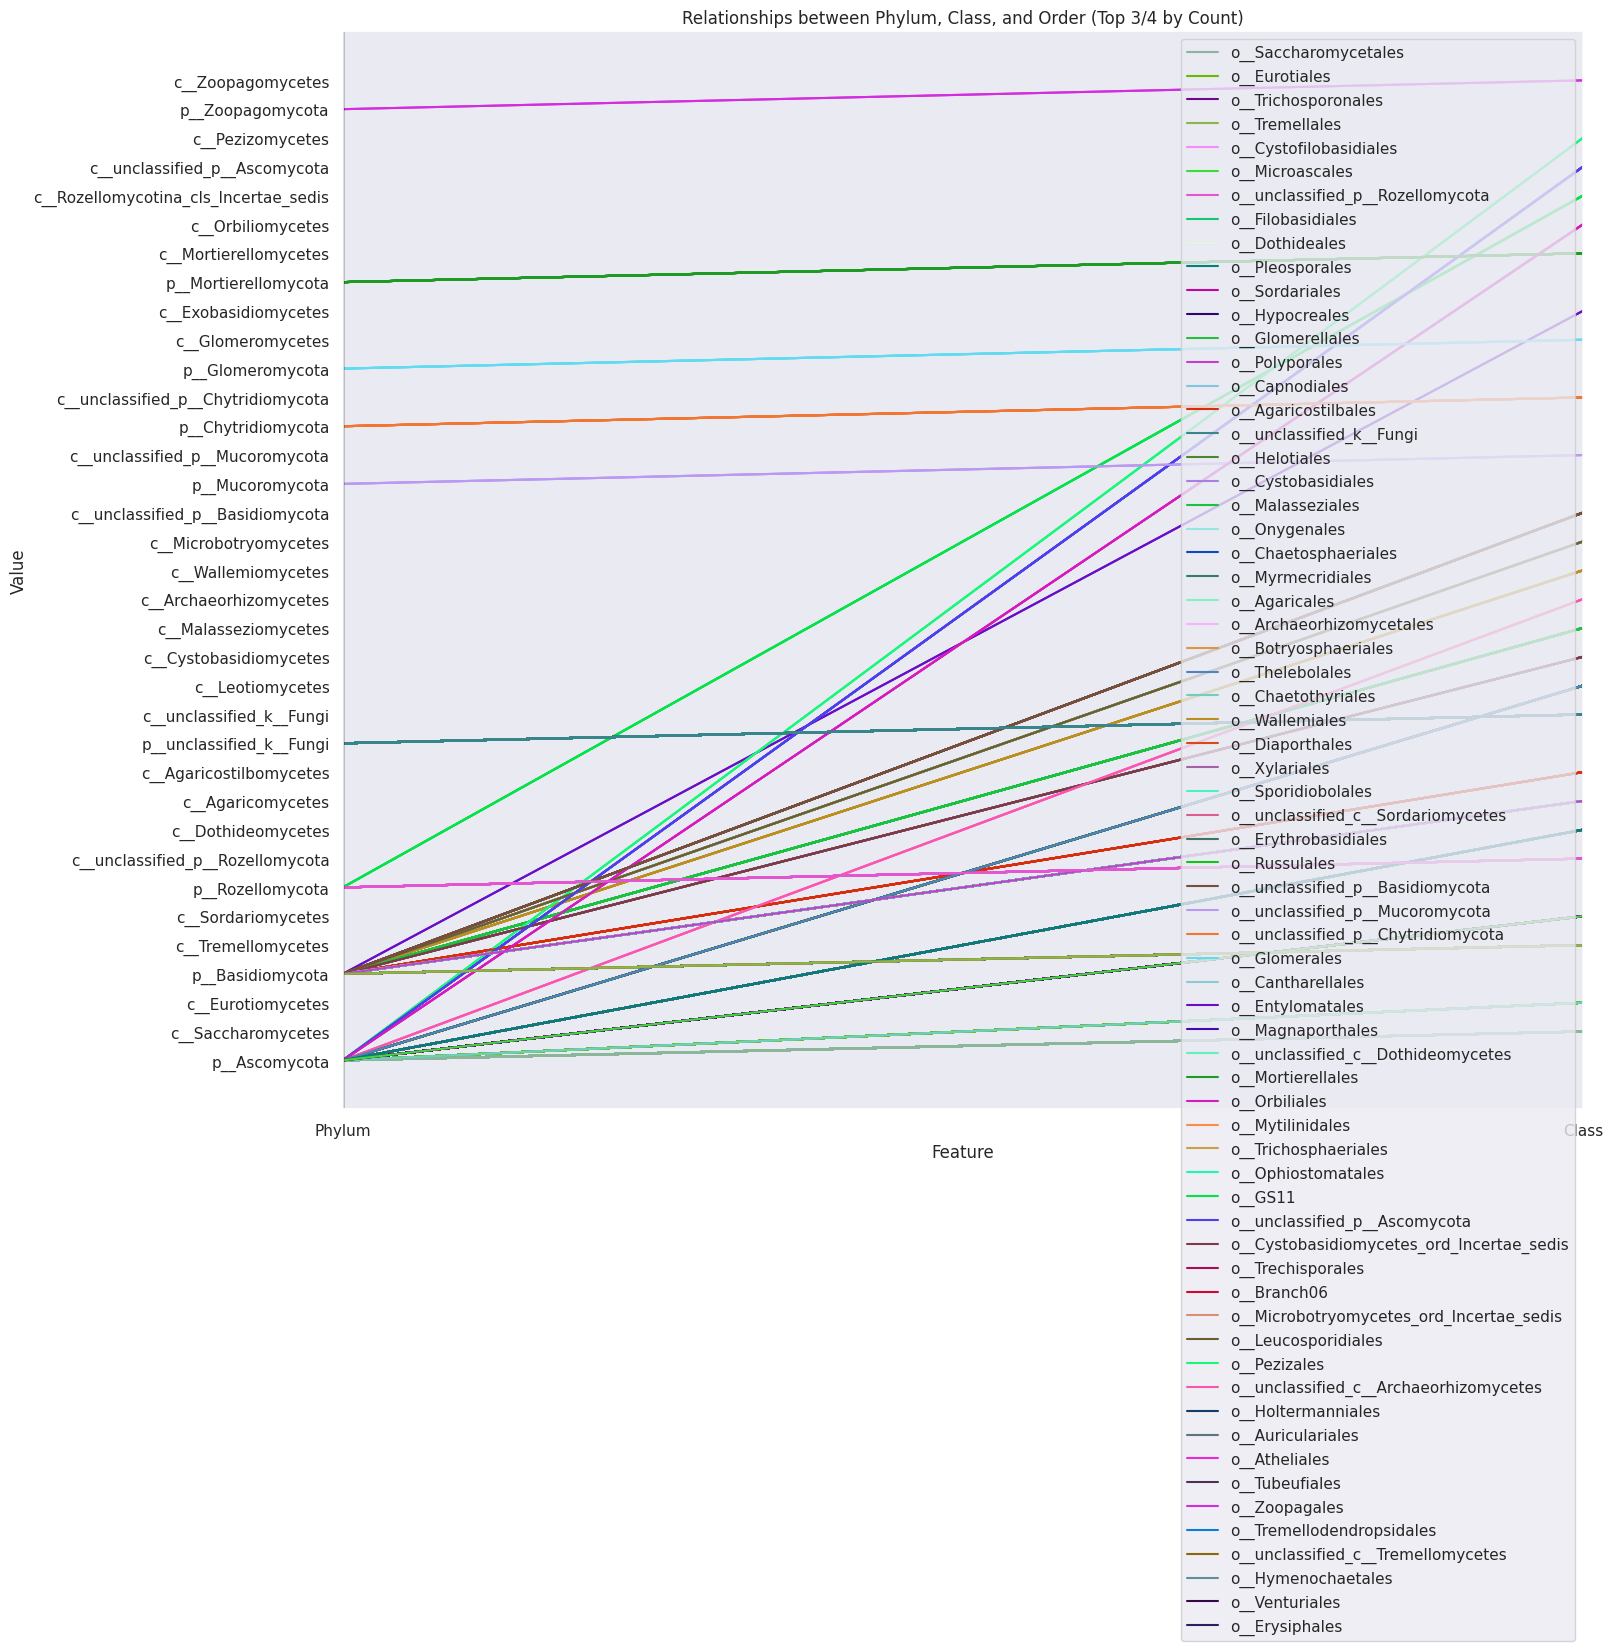

In [8]:
from pandas.plotting import parallel_coordinates
sns.set(rc={'figure.figsize':(16,14)})

# calculate total count for each order
order_counts = df_fungus.groupby('Order')['Class'].count()
order_counts = order_counts.sort_values(ascending=False)  # sort in descending order

# select the top orders by count
num_orders = len(order_counts)
top_orders = order_counts[:int(num_orders*3/4)]
top_orders = top_orders.index.tolist()

# select only the top orders in the dataframe
df_fungus_top = df_fungus[df_fungus['Order'].isin(top_orders)]

# create the parallel coordinates plot for the top orders
parallel_coordinates(df_fungus_top[['Phylum', 'Class', 'Order']], 'Order')

# add labels and title
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Relationships between Phylum, Class, and Order (Top 3/4 by Count)')

# show plot
plt.show()

### tree map

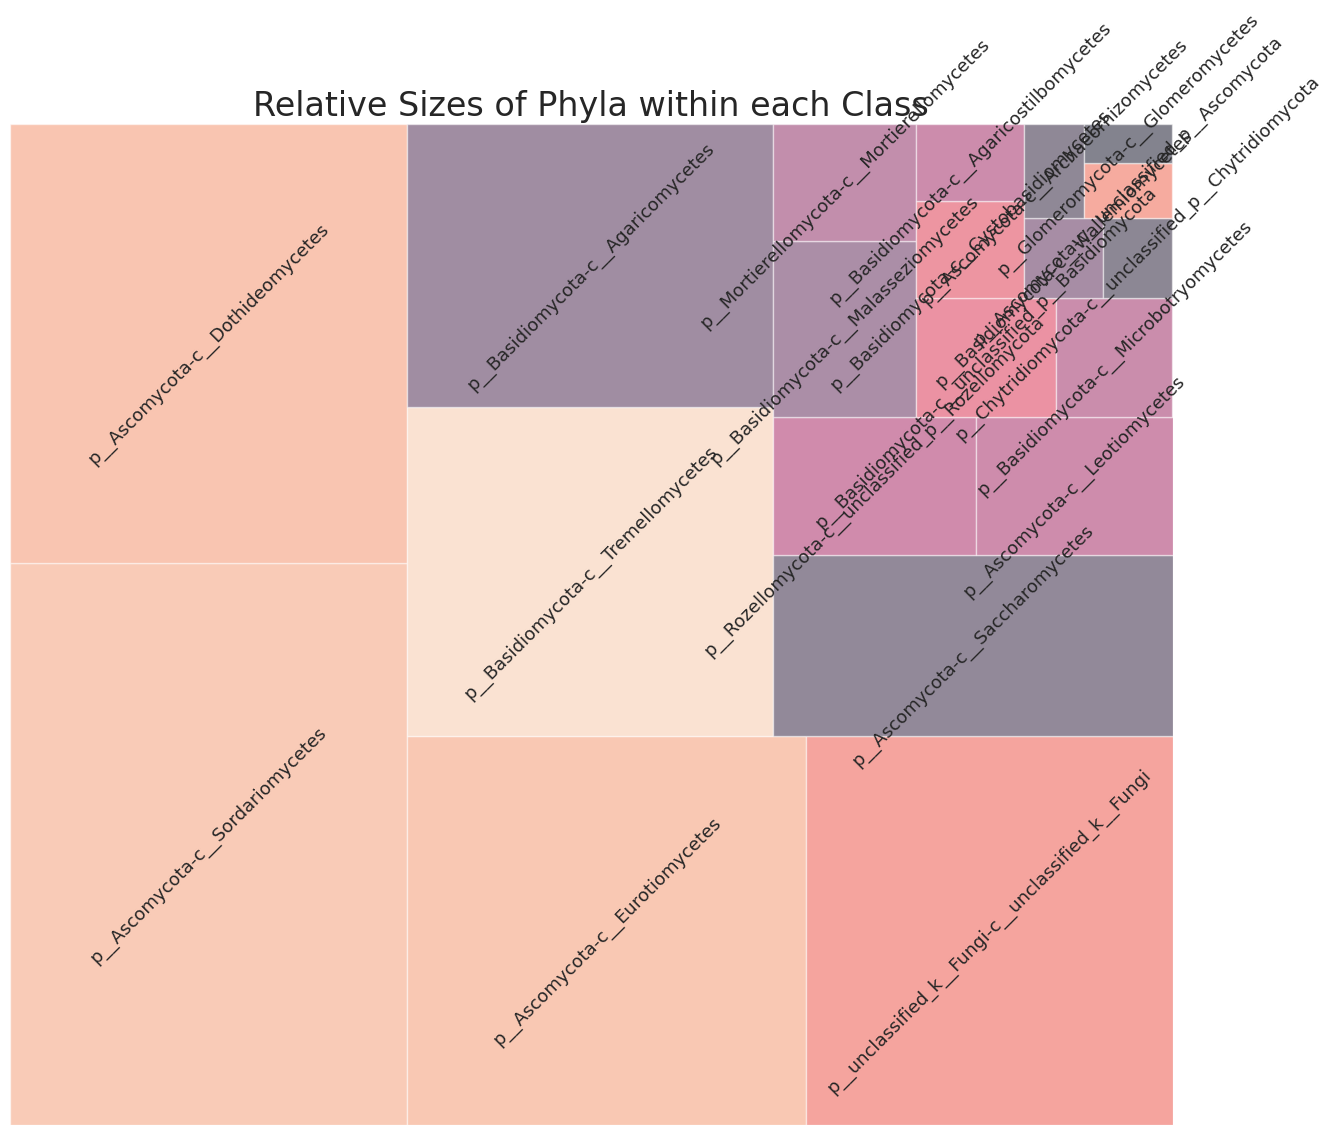

In [9]:
# import neccesary library
import squarify

fig = plt.gcf()
fig.set_size_inches(15, 13)


# calculate the number of species in each Phylum-Class combination
counts = df_fungus.groupby(['Phylum', 'Class'])['Order'].count().reset_index()

n = 20
top_counts = counts.sort_values(by='Order', ascending=False).head(n)
squarify.plot(sizes=top_counts['Order'], label=top_counts['Phylum'] + '-' + top_counts['Class'], 
              alpha=.5, text_kwargs={'fontsize':13, 'rotation':45})

# add labels and title
plt.axis('off')
plt.title('Relative Sizes of Phyla within each Class', fontsize=24)

# show plot
plt.show()

>The size of each box represents the number of species in that combination

### clustering

In [10]:
# import relevant library
from sklearn.cluster import KMeans

# load the data
data = df_fungus

# select relevant columns for clustering
columns = ["SUM", "Percent", "P12", "C2", "Pm3", "C4", 
           "C5", "C6", "C7", "P1", "p8", "c13", "pm2", 
           "c3", "pm4", "pm5", "pm6", "pm7", "pm8", "pm9"]

X = data[columns]

# apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# add cluster labels to the data
data["cluster"] = clusters

# group data by cluster and species
grouped = pd.DataFrame(data.groupby(["cluster", "Species"]).mean())

# print the average values for each column, grouped by cluster and species
grouped

SUM   Percent      P12      C2  \
cluster Species                                                               
0       s__Acanthostigma_perpusillum        13.0  0.000007      0.0     0.0   
        s__Acaulium_acremonium             190.0  0.000109      0.0     0.0   
        s__Achaetomium_sp                    3.0  0.000002      0.0     0.0   
        s__Acremonium_acutatum             318.0  0.000182      0.0     0.0   
        s__Acremonium_charticola            64.0  0.000037      0.0    64.0   
...                                          ...       ...      ...     ...   
1       s__unclassified_g__Apiotrichum  573839.0  0.327992   9741.0  5620.0   
2       s__Candida_albicans              95969.0  0.054853  12133.0     0.0   
        s__Candida_parapsilosis          65422.0  0.037394     21.0     0.0   
        s__Cryptococcus_cyanovorans     177670.0  0.101552   3200.0  2493.0   
        s__unclassified_g__Aspergillus   89015.0  0.050879    999.0  2037.0   

                                            Pm3      C4      C5      C6  \
cluster Species                                                           
0       s__Acanthostigma_perpusillum        0.0     0.0     0.0     0.0   
        s__Acaulium_acremonium              0.0     0.0     0.0     0.0   
        s__Achaetomium_sp                   0.0     0.0     0.0     0.0   
        s__Acremonium_acutatum              0.0     0.0     0.0     0.0   
        s__Acremonium_charticola            0.0     0.0     0.0     0.0   
...                                         ...     ...     ...     ...   
1       s__unclassified_g__Apiotrichum  14867.0  2558.0  4253.0  3376.0   
2       s__Candida_albicans                 0.0     0.0     0.0     0.0   
        s__Candida_parapsilosis             0.0  3307.0  1669.0  1032.0   
        s__Cryptococcus_cyanovorans      2730.0   530.0  2777.0  2320.0   
        s__unclassified_g__Aspergillus   2002.0   362.0   816.0  2062.0   

                                            C7       P1  ...      p8     c13  \
cluster Species                                          ...                   
0       s__Acanthostigma_perpusillum       0.0      0.0  ...     0.0     0.0   
        s__Acaulium_acremonium             0.0      0.0  ...     0.0     0.0   
        s__Achaetomium_sp                  0.0      0.0  ...     0.0     0.0   
        s__Acremonium_acutatum             0.0      0.0  ...     0.0     0.0   
        s__Acremonium_charticola           0.0      0.0  ...     0.0     0.0   
...                                        ...      ...  ...     ...     ...   
1       s__unclassified_g__Apiotrichum  2662.0   2152.0  ...  8155.0  2779.0   
2       s__Candida_albicans                0.0  19108.0  ...     0.0     0.0   
        s__Candida_parapsilosis         9802.0    195.0  ...   966.0  3533.0   
        s__Cryptococcus_cyanovorans     1152.0    600.0  ...  6658.0  1494.0   
        s__unclassified_g__Aspergillus  1727.0   2177.0  ...  1814.0   698.0   

                                            pm2      c3      pm4     pm5  \
cluster Species                                                            
0       s__Acanthostigma_perpusillum        0.0     0.0      0.0     0.0   
        s__Acaulium_acremonium              0.0     0.0      0.0     0.0   
        s__Achaetomium_sp                   0.0     0.0      0.0     0.0   
        s__Acremonium_acutatum              0.0     0.0      0.0     0.0   
        s__Acremonium_charticola            0.0     0.0      0.0     0.0   
...                                         ...     ...      ...     ...   
1       s__unclassified_g__Apiotrichum  12386.0  3655.0  12088.0  9760.0   
2       s__Candida_albicans                 0.0     0.0      0.0     0.0   
        s__Candida_parapsilosis           785.0   481.0   1496.0  1956.0   
        s__Cryptococcus_cyanovorans      6101.0  1860.0   5264.0  6783.0   
        s__unclassified_g__Aspergillus    789.0    13.0   1266.0   451.0   

           

>The results show a clustering of species based on their abundance in the different samples. There are three clusters, labeled 0, 1, and 2, and each cluster contains different species. The number of reads, expressed as the "SUM" column, is also shown for each species within the cluster.

>Overall, the results provide insight into the composition of microbial populations in the samples and can help identify which species are most abundant.

### correlation from the clusters

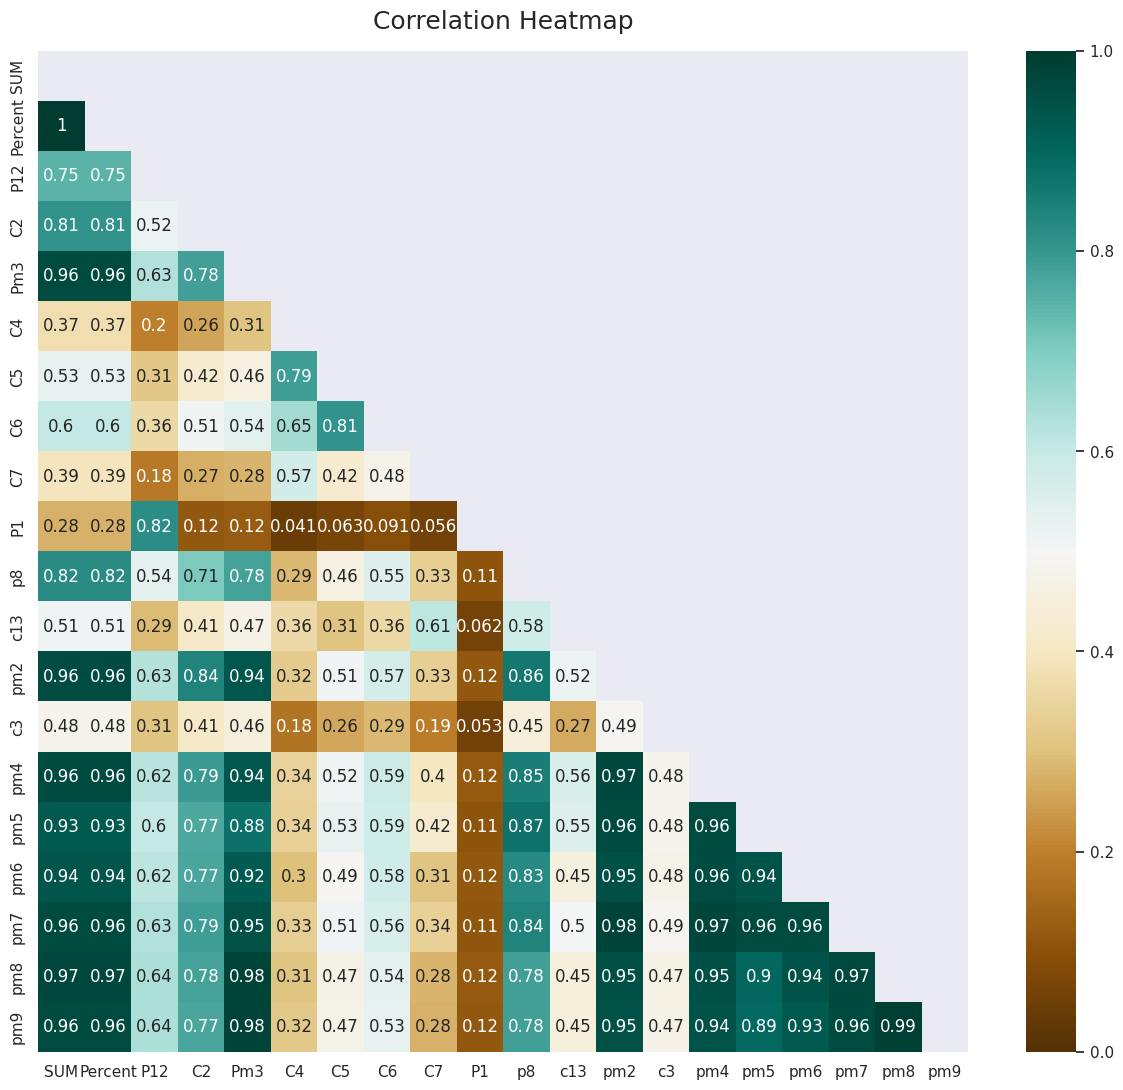

In [11]:
# function to plot correlation
def corre_plot(df):
    # mask    
    np.triu(np.ones_like(df.corr()))

    #visualize array
    plt.figure(figsize=(15, 13))
    
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

    # show plot
    plt.show()
    
# call function
corre_plot(X)

>SUM and Percent are highly correlated to pm4

### OTU table

In [12]:
# define the taxonomic levels to aggregate at
tax_levels = ['Phylum', 'Class', 'Order', 'Family', 'Genus']

# group the sequences by the defined taxonomic levels
grouped = df_fungus.groupby(tax_levels)

# sum the sequence counts for each taxonomic group
otu_table = grouped['SUM'].sum()

# transpose the OTU table so that samples are columns and OTUs are rows
otu_table = pd.DataFrame(otu_table.transpose())


# remove any rows that have only zeros (i.e. OTUs that are not present in any sample)
otu_table = otu_table.loc[(otu_table != 0).any(axis=1)]

# divide each row by its sum to convert counts to relative abundances
otu_table = otu_table.div(otu_table.sum(axis=1), axis=0)

otu_table

SUM
Phylum                   Class                                 Order                                  Family                                 Genus                                      
p__Ascomycota            c__Archaeorhizomycetes                o__Archaeorhizomycetales               f__Archaeorhizomycetaceae              g__Archaeorhizomyces                    1.0
                                                               o__unclassified_c__Archaeorhizomycetes f__unclassified_c__Archaeorhizomycetes g__unclassified_c__Archaeorhizomycetes  1.0
                         c__Arthoniomycetes                    o__Lichenostigmatales                  f__Phaeococcomycetaceae                g__Phaeococcomyces                      1.0
                         c__Dothideomycetes                    o__Acrospermales                       f__Acrospermales_fam_Incertae_sedis    g__Leptodiscella                        1.0
                                                               o__Botryosphaeriales                   f__Botryosphaeriaceae                  g__Botryosphaeria                       1.0
...                                                                                                                                                                                  ...
p__Olpidiomycota         c__Olpidiomycetes                     o__Olpidiales                          f__Olpidiaceae                         g__Olpidium                             1.0
p__Rozellomycota         c__Rozellomycotina_cls_Incertae_sedis o__GS11                                f__unclassified_o__GS11                g__unclassified_o__GS11                 1.0
                         c__unclassified_p__Rozellomycota      o__unclassified_p__Rozellomycota       f__unclassified_p__Rozellomycota       g__unclassified_p__Rozellomycota        1.0
p__Zoopagomycota         c__Zoopagomycetes                     o__Zoopagales                          f__Piptocephalidaceae                  g__Syncephalis                          1.0
p__unclassified_k__Fungi c__unclassified_k__Fungi              o__unclassified_k__Fungi               f__unclassified_k__Fungi               g__unclassified_k__Fungi                1.0

[460 rows x 1 columns]

>The OTU table reports the abundance of each OTU (a cluster of sequences that are similar to each other) in each sample.

# 5 Data Preprocessing

### numerical

In [13]:
# select numerical columns
numerical_cols = df_fungus.select_dtypes(include='number')

# import relevant libraries
from sklearn.preprocessing import normalize

# normalize the abundance data using L1 norm
df_norm = pd.DataFrame(normalize(numerical_cols, norm='l1'), columns=numerical_cols.columns)

# print the normalized data
df_norm.head()

,SUM,Percent,P12,C2,Pm3,C4,C5,C6,C7,P1,...,c13,pm2,c3,pm4,pm5,pm6,pm7,pm8,pm9,cluster
0,0.499995,2.857844e-07,0.063212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099552,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.041992e-05
1,0.500000,2.857874e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,0.499994,2.857842e-07,0.005611,0.011442,0.011245,0.002033,0.004583,0.011582,0.009701,0.012228,...,0.003921,0.004432,0.000073,0.007111,0.002533,0.007004,0.000753,0.006358,0.003443,1.123393e-05
3,0.499999,2.857871e-07,0.008488,0.004897,0.012954,0.002229,0.003706,0.002942,0.002319,0.001875,...,0.002421,0.010792,0.003185,0.010533,0.008504,0.012705,0.012130,0.013410,0.013975,8.713235e-07
4,0.499997,2.857858e-07,0.009005,0.007016,0.007683,0.001492,0.007815,0.006529,0.003242,0.001689,...,0.004204,0.017169,0.005234,0.014814,0.019089,0.019505,0.016716,0.009169,0.009231,5.628379e-06


### Dimension reduction

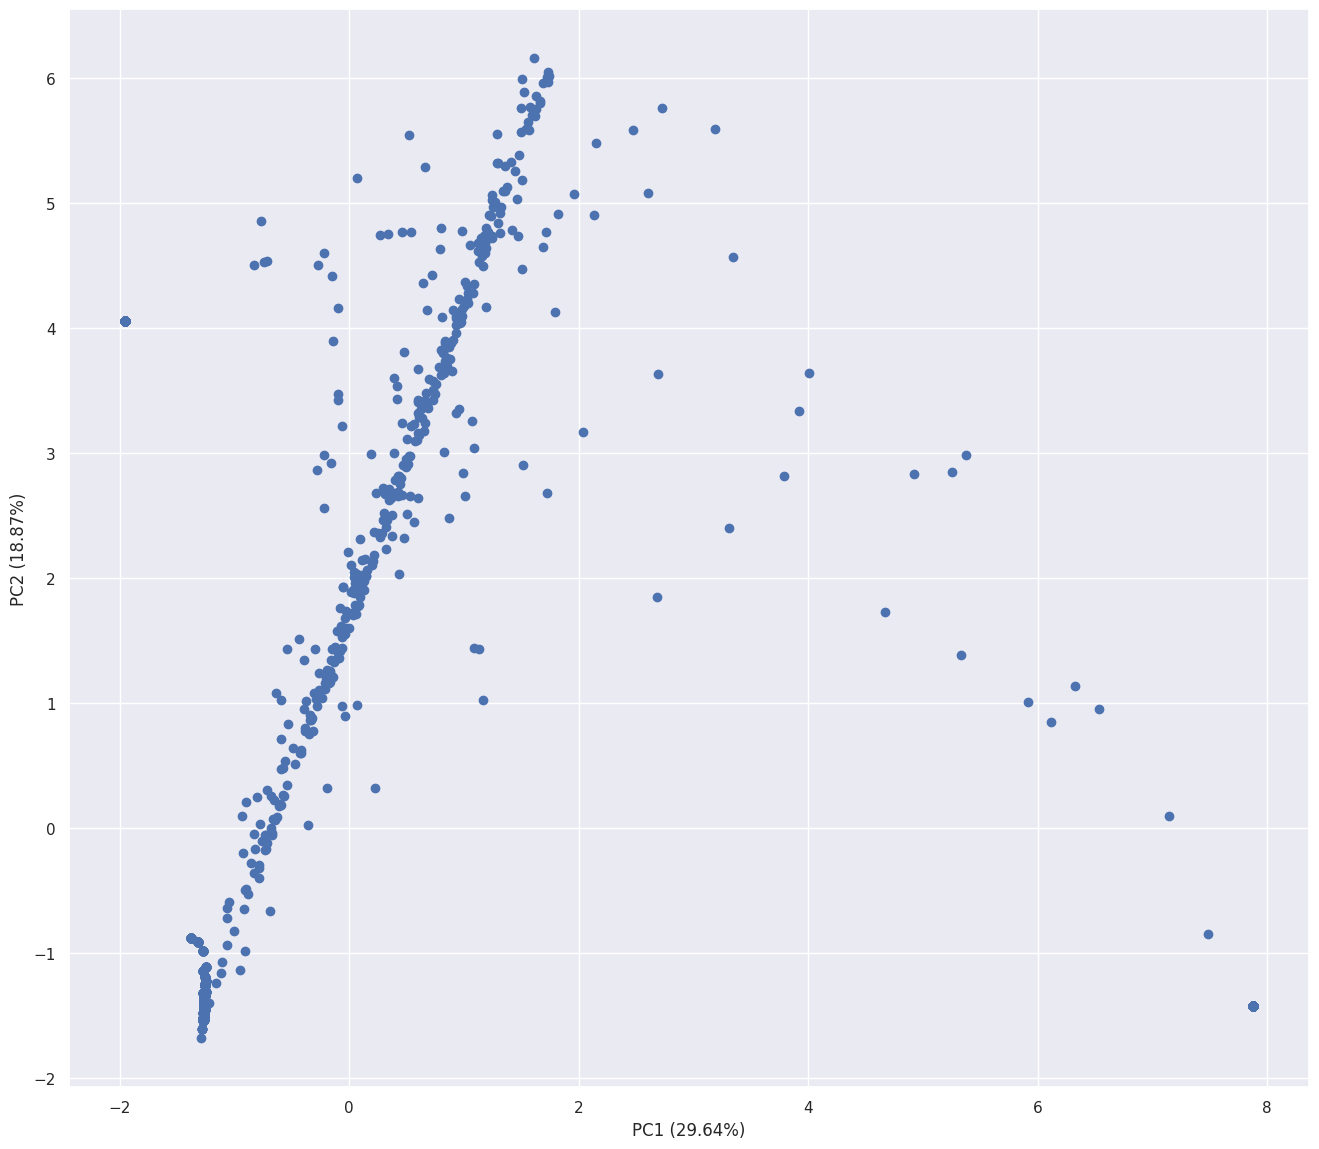

In [14]:
# import neccessary library
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

# calculate the distance matrix using the Euclidean distance metric
distance_matrix = pairwise_distances(df_norm, metric='euclidean')

# perform PCA on the distance matrix
pca = PCA(n_components=2)
pca.fit(distance_matrix)

# project the data onto the first two principal components
pcoa_data = pca.transform(distance_matrix)

# plot the results
plt.scatter(pcoa_data[:,0], pcoa_data[:,1])
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.show()

### conversion of categorical

In [15]:
# import relevant libraries
from sklearn.preprocessing import LabelEncoder

# select categorical columns
numerical_cols = df_fungus.select_dtypes(include='object')

# convert the taxonomic variables to numeric using label encoding
le = LabelEncoder()
df_taxonomic_enc = numerical_cols.apply(le.fit_transform)

# print the encoded data
df_taxonomic_enc.head(7)

,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV,,,,,,,,
ASV413,0,0,0,24,59,145,46,65
ASV970,0,0,0,24,59,145,46,65
ASV11,0,0,0,8,26,9,26,605
ASV1,0,0,1,28,70,177,16,603
ASV3,0,0,1,28,67,171,79,119
ASV29,0,0,0,8,26,9,197,654
ASV194,0,0,0,24,59,145,46,70


### target column
PM4 is chosen as a feature because it represents a particular fungal strain or species that is of interest in the context of the data analysis.
* 0 --> Healthy
* 1 --> Unhealthy

In [16]:
# create a new column 'pm4_binary' with values 0 or 1
df_norm['target'] = (df_norm['pm4'] > 0).astype(int)

# print the value counts of the new column
df_norm['target'].value_counts()

0    1659
1      49
Name: target, dtype: int64

combine categorical and numerical columns for modelling

In [17]:
# reset index then concat dfs
df1_reset = df_taxonomic_enc.reset_index(drop=True)
df2_reset = df_norm.reset_index(drop=True)
result = pd.concat([df2_reset, df1_reset], axis=1)

In [18]:
# drop irrelevant colums
irrelevant_columns = ["pm4", "cluster", "Domain", "Kingdom"]
final_df = result.drop(irrelevant_columns, axis=1)
final_df.head(7)

,SUM,Percent,P12,C2,Pm3,C4,C5,C6,C7,P1,...,pm7,pm8,pm9,target,Phylum,Class,Order,Family,Genus,Species
0,0.499995,2.857844e-07,0.063212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099552,...,0.000000,0.000000,0.000000,0,0,24,59,145,46,65
1,0.500000,2.857874e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0,0,24,59,145,46,65
2,0.499994,2.857842e-07,0.005611,0.011442,0.011245,0.002033,0.004583,0.011582,0.009701,0.012228,...,0.000753,0.006358,0.003443,1,0,8,26,9,26,605
3,0.499999,2.857871e-07,0.008488,0.004897,0.012954,0.002229,0.003706,0.002942,0.002319,0.001875,...,0.012130,0.013410,0.013975,1,1,28,70,177,16,603
4,0.499997,2.857858e-07,0.009005,0.007016,0.007683,0.001492,0.007815,0.006529,0.003242,0.001689,...,0.016716,0.009169,0.009231,1,1,28,67,171,79,119
5,0.500000,2.857874e-07,0.001139,0.004165,0.011505,0.002637,0.016808,0.011415,0.008150,0.008569,...,0.000000,0.009498,0.000000,1,0,8,26,9,197,654
6,0.499992,2.857830e-07,0.000160,0.000000,0.000000,0.025274,0.012755,0.007887,0.074912,0.001490,...,0.007039,0.000000,0.000504,1,0,24,59,145,46,70


# 6 Modelling

In [19]:
# import neccesary libraries
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score

In [20]:
# function to evaluate models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef

def evaluate_model(model, X_test, y_test):
    # make predictions
    y_pred = model.predict(X_test)
    
    # calculate performance metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # create pandas dataframe of results
    results = pd.DataFrame({
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F-value': [f1],
        'MCC': [mcc]
    })
    
    return results

### Features and Target

In [21]:
# set predictors
X = final_df.drop("target", axis=1)

# set target
y = final_df["target"]

**Test - Train Split**

In [22]:
# import relevant libraries
from sklearn.model_selection import train_test_split

# split the data into training and test sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scale the Test and Train

In [23]:
# import relvant libraries
from sklearn.preprocessing import StandardScaler

# scale the data using standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### baseline model
>SVM

Training Perfomance: 
accuracy --> 1.0
recall --> 1.0

Test Perfomance
accuracy : 0.9912280701754386
recall : 0.8


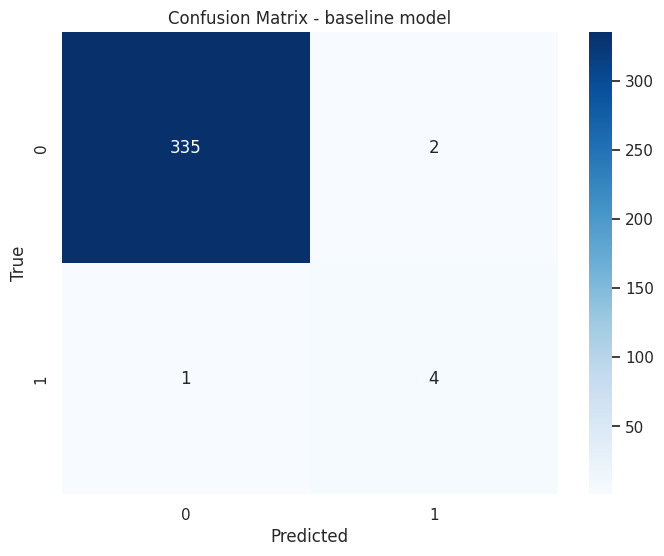

In [25]:
# import relevant libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# create Support Vector Machine (SVM) classifier
svm_clf = SVC(C=10, gamma=0.1)

# fit model
svm_clf.fit(X_train, y_train)

# test model
y_train_pred_base = svm_clf.predict(X_train)
y_test_pred_base = svm_clf.predict(X_test)

# calculate performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred_base)
test_accuracy = accuracy_score(y_test, y_test_pred_base)
train_recall = recall_score(y_train, y_train_pred_base)
test_recall = recall_score(y_test, y_test_pred_base)

# print the performance metrics
print("Training Perfomance: ")
print(f"accuracy --> {train_accuracy}")
print(f"recall --> {train_recall}")
print()
print(f"Test Perfomance")
print(f"accuracy : {test_accuracy}")
print(f"recall : {test_recall}")

# compute the confusion matrix for the test data
cm = confusion_matrix(y_test, y_test_pred_base)

# create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - baseline model')
plt.show()

### naive bayes
>GaussianNB

Training Perfomance: 
accuracy --> 0.8696925329428989
recall --> 1.0

Test Perfomance
accuracy : 0.8538011695906432
recall : 0.8



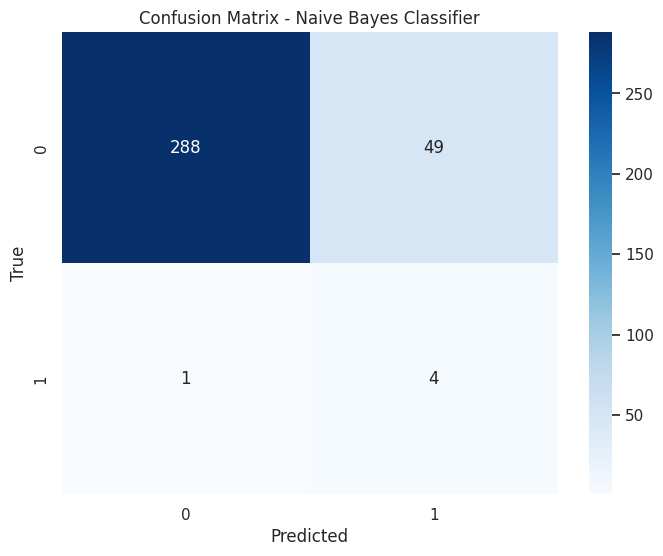

In [26]:
# train a Naive Bayes classifier
nb_clf = GaussianNB(var_smoothing=1e-05)

# fit
nb_clf.fit(X_train, y_train)

# test model
y_train_pred = nb_clf.predict(X_train)
y_test_pred = nb_clf.predict(X_test)

# calculate performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# print the performance metrics
print("Training Perfomance: ")
print(f"accuracy --> {train_accuracy}")
print(f"recall --> {train_recall}")
print()
print(f"Test Perfomance")
print(f"accuracy : {test_accuracy}")
print(f"recall : {test_recall}")
print()

# compute the confusion matrix for the test data
cm = confusion_matrix(y_test, y_test_pred)

# create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()

## Ensemble Method

>Naive Bayes and SVM classifiers as the base classifiers and a linear SVM as the meta-classifier

Accuracy: 0.985


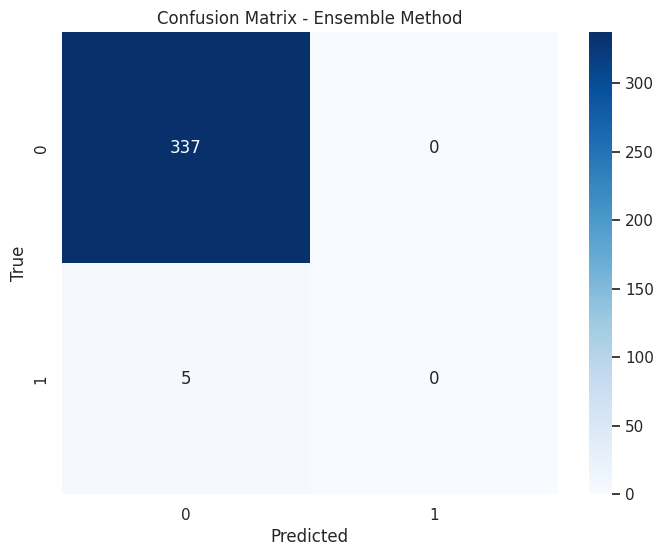

In [27]:
# import relevant libraries
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification

# define the base classifiers
nb_clf = GaussianNB(var_smoothing=1e-05)
svm_clf = SVC(C=10, gamma=0.1)

# define the meta-classifier
meta_clf = SVC(C=1, kernel='linear')

# define the stacking classifier
ensemble_model = StackingClassifier(
    estimators=[('nb', nb_clf), ('svm', svm_clf)],
    final_estimator=meta_clf
)

# train the ensemble model
ensemble_model.fit(X_train, y_train)

# make predictions
y_pred_ense = ensemble_model.predict(X_test)


# evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

# compute the accuracy on the test data
acc3 = accuracy_score(y_test, y_pred_ense)
print(f"Accuracy: {acc3:.3f}")

# compute the confusion matrix for the test data
cm3 = confusion_matrix(y_test, y_pred_ense)

# create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='g', cmap='Blues')

# set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Ensemble Method')
plt.show()

## Neural Network Models

>**Recurrent Neural Networks (RNN)**

In [31]:
# import necessary libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers import LSTM

# split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# convert the data to numpy arrays and reshape
x_train = np.array(train_data)
y_train = keras.utils.to_categorical(np.array(train_labels))
x_test = np.array(test_data)
y_test = keras.utils.to_categorical(np.array(test_labels))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# define the number of classes in your classification problem
num_classes = 2

# define RNN model
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(num_classes, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1);


Epoch 1/10
43/43 [==============================] - 8s 100ms/step - loss: 0.2101 - accuracy: 0.9444 - val_loss: 0.0842 - val_accuracy: 0.9854
Epoch 2/10
43/43 [==============================] - 4s 94ms/step - loss: 0.1409 - accuracy: 0.9678 - val_loss: 0.0836 - val_accuracy: 0.9854
Epoch 3/10
43/43 [==============================] - 4s 88ms/step - loss: 0.1398 - accuracy: 0.9678 - val_loss: 0.0764 - val_accuracy: 0.9854
Epoch 4/10
43/43 [==============================] - 4s 89ms/step - loss: 0.1389 - accuracy: 0.9678 - val_loss: 0.0734 - val_accuracy: 0.9854
Epoch 5/10
43/43 [==============================] - 4s 87ms/step - loss: 0.1375 - accuracy: 0.9678 - val_loss: 0.0776 - val_accuracy: 0.9854
Epoch 6/10
43/43 [==============================] - 4s 87ms/step - loss: 0.1376 - accuracy: 0.9678 - val_loss: 0.0755 - val_accuracy: 0.9854
Epoch 7/10
43/43 [==============================] - 4s 86ms/step - loss: 0.1381 - accuracy: 0.9678 - val_loss: 0.0741 - val_accuracy: 0.9854
Epoch 8/10
4

In [33]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
43/43 [==============================] - 4s 84ms/step - loss: 0.1345 - accuracy: 0.9678 - val_loss: 0.0701 - val_accuracy: 0.9854
Epoch 2/10
43/43 [==============================] - 4s 84ms/step - loss: 0.1345 - accuracy: 0.9678 - val_loss: 0.0698 - val_accuracy: 0.9854
Epoch 3/10
43/43 [==============================] - 4s 84ms/step - loss: 0.1349 - accuracy: 0.9678 - val_loss: 0.0714 - val_accuracy: 0.9854
Epoch 4/10
43/43 [==============================] - 4s 87ms/step - loss: 0.1344 - accuracy: 0.9678 - val_loss: 0.0698 - val_accuracy: 0.9854
Epoch 5/10
43/43 [==============================] - 4s 85ms/step - loss: 0.1342 - accuracy: 0.9678 - val_loss: 0.0713 - val_accuracy: 0.9854
Epoch 6/10
43/43 [==============================] - 4s 86ms/step - loss: 0.1337 - accuracy: 0.9678 - val_loss: 0.0707 - val_accuracy: 0.9854
Epoch 7/10
43/43 [==============================] - 4s 86ms/step - loss: 0.1330 - accuracy: 0.9678 - val_loss: 0.0701 - val_accuracy: 0.9854
Epoch 8/10
43

#### Loss and Accuracy Plots

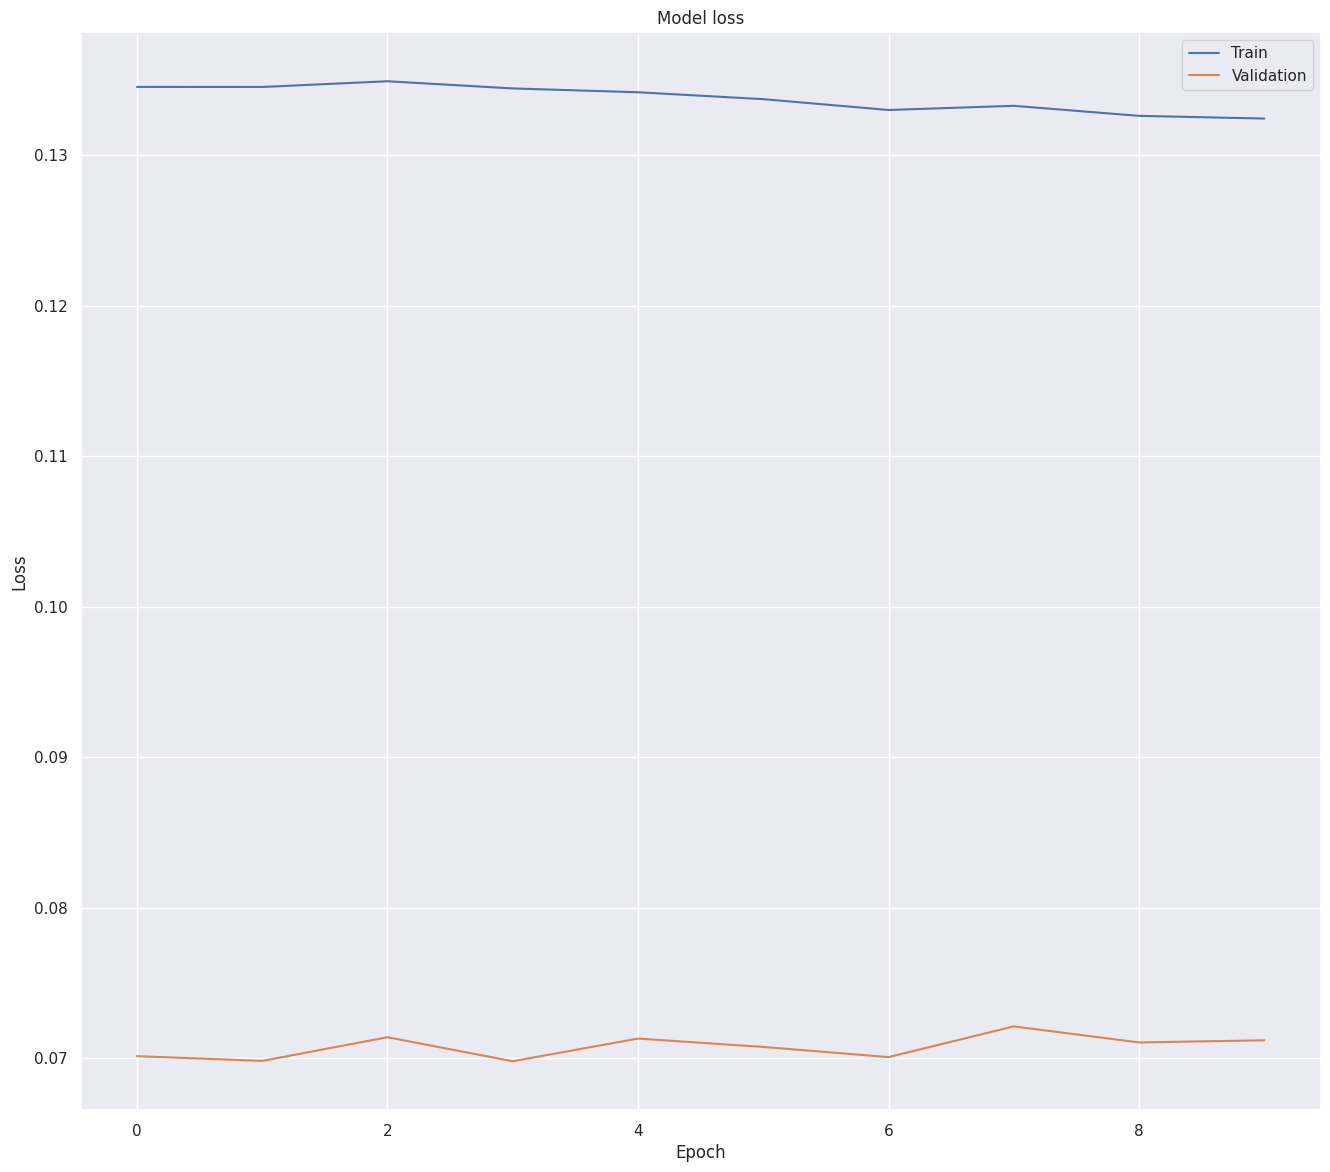

In [34]:
# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


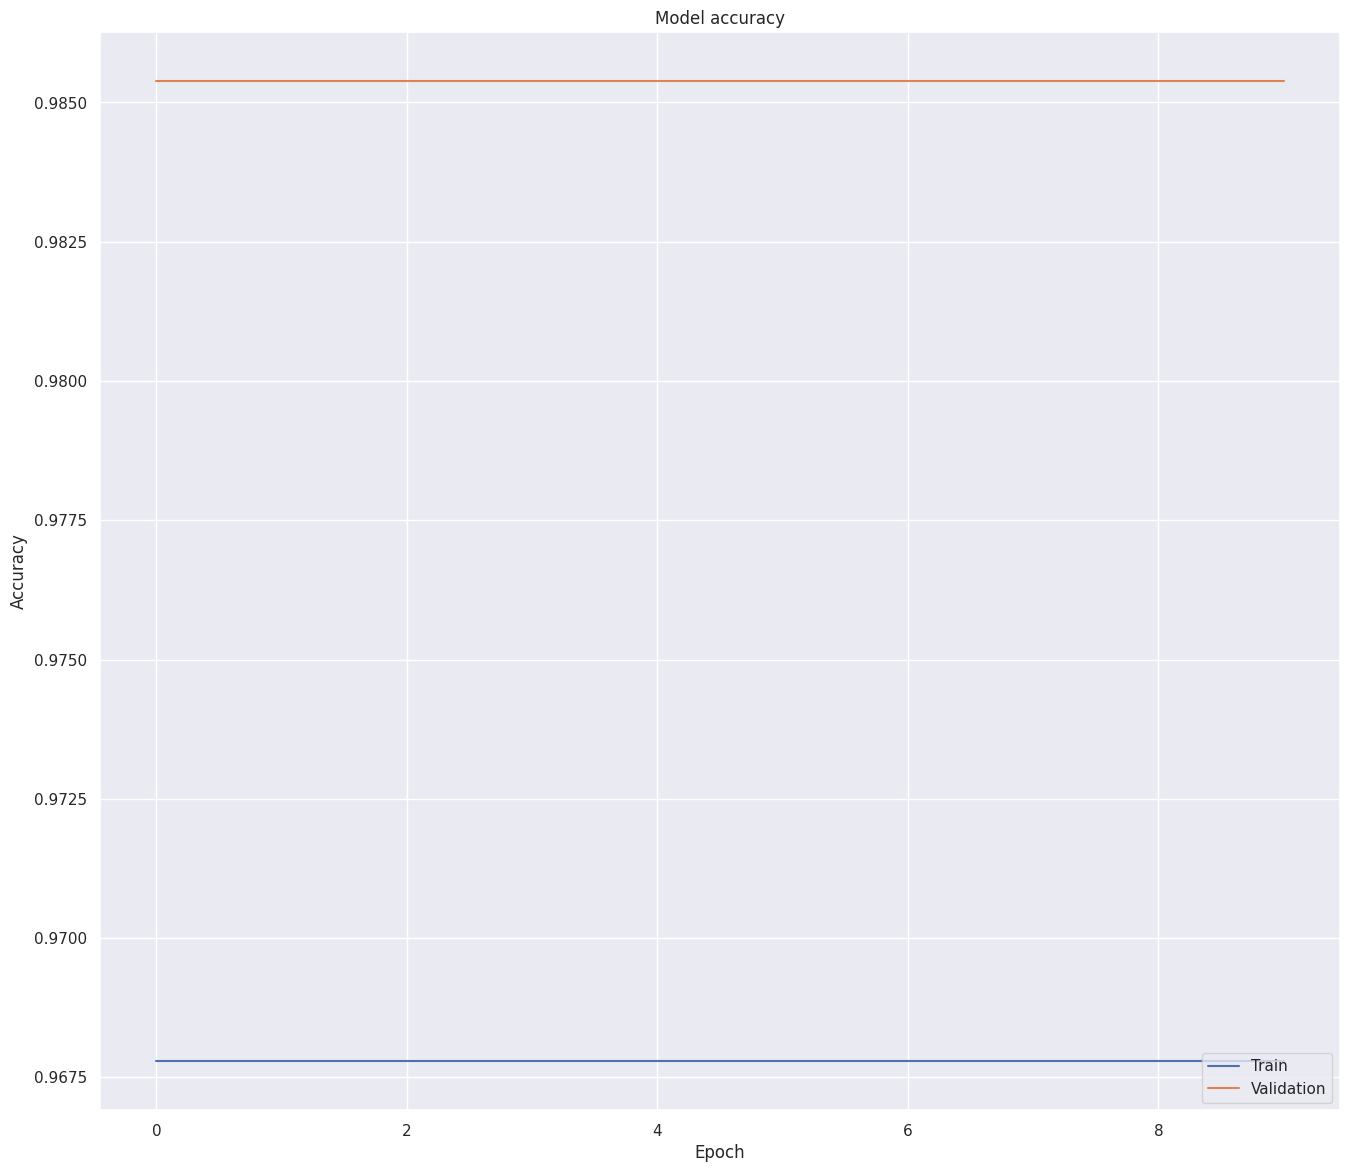

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


>**Convolutional Neural Network (CNN) model** 

###### split data

In [36]:
# split the data into training, validation, and test sets
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# scale the data using standard scaling
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)

###### build the model

fully connected neural network with two hidden layers and a dropout layer in between them

In [37]:
# import relevant libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout

# ignore warnings
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

# define the CNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### train the model

In [39]:
# view perfoance in training accuaracy
history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(val_data, val_labels))

Epoch 1/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0578 - accuracy: 0.9670 - val_loss: 0.0503 - val_accuracy: 0.9781
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9679 - val_loss: 0.0497 - val_accuracy: 0.9781
Epoch 3/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9716 - val_loss: 0.0483 - val_accuracy: 0.9781
Epoch 4/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0545 - accuracy: 0.9689 - val_loss: 0.0479 - val_accuracy: 0.9781
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9670 - val_loss: 0.0477 - val_accuracy: 0.9818
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9725 - val_loss: 0.0482 - val_accuracy: 0.9818
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9753 - val_loss: 0.0480 - val_accuracy: 0.9818
Epoch 8/20
35/35 [==

#### evaluate the model

In [40]:
# evaluate model frequency
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

11/11 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9883
Test accuracy: 0.988304078578949


#### plot the training and validation loss and accuracy

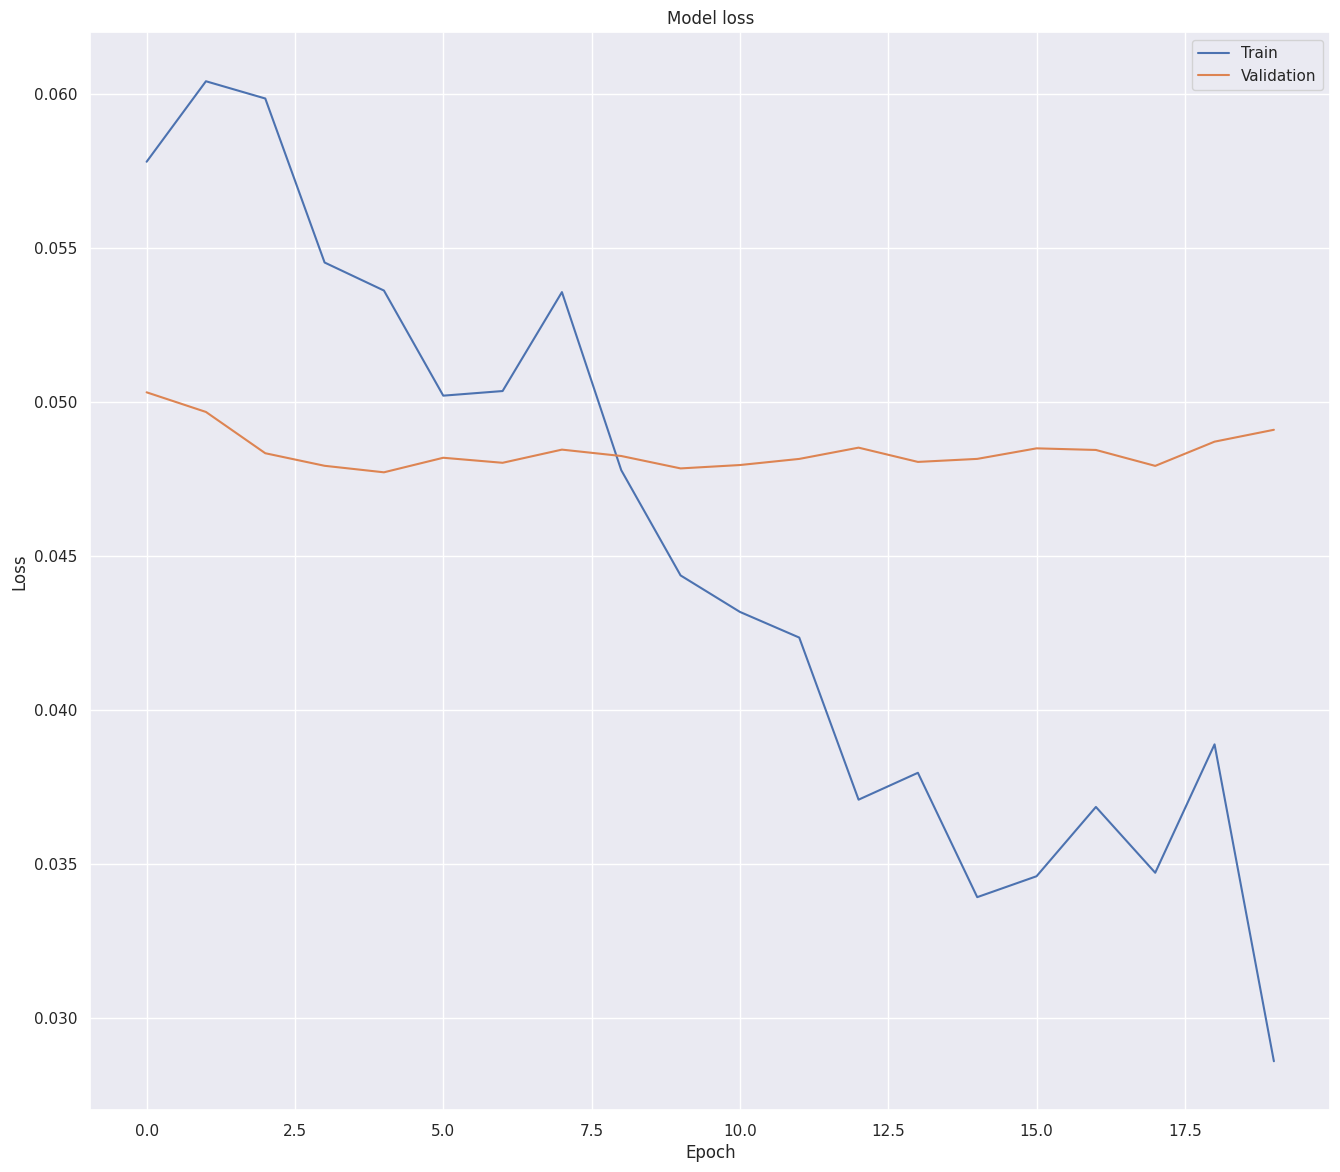

In [41]:
# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### validation accuracy

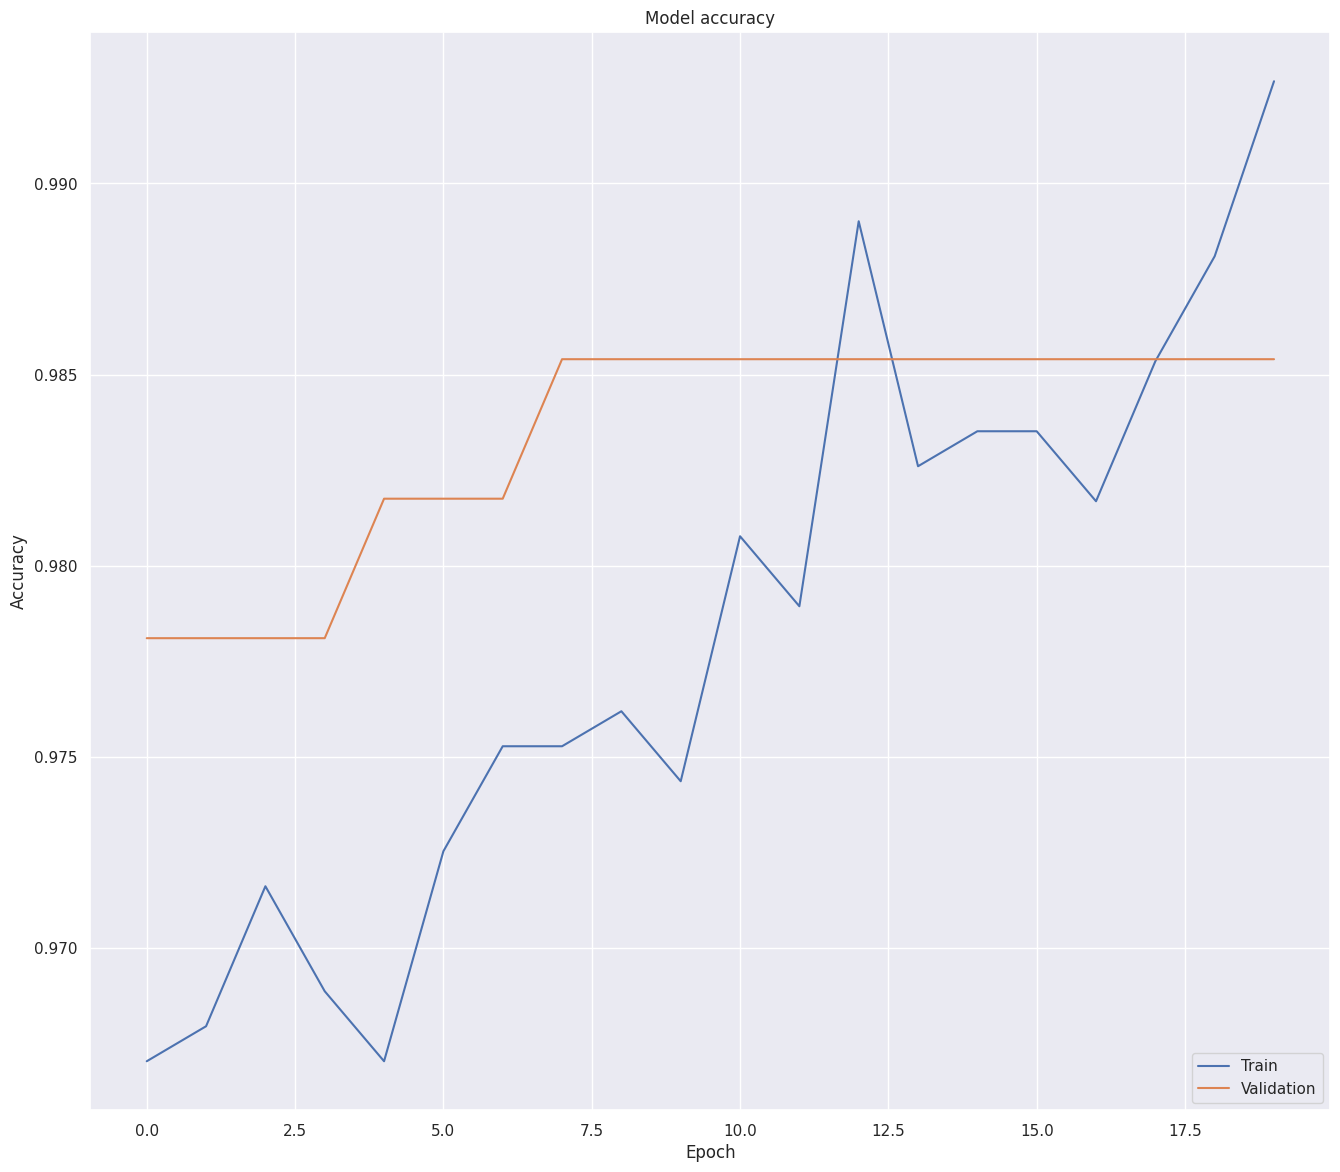

In [42]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [45]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Define base model
base_model = DecisionTreeRegressor()

# Define ensemble model with bagging
ensemble_model = BaggingRegressor(base_estimator=base_model, n_estimators=10)

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# evaluate
from sklearn.metrics import mean_squared_error, r2_score

# make predictions on train and test data using the ensemble model
y_train_pred = ensemble_model.predict(X_train)
y_test_pred = ensemble_model.predict(X_test)

# Calculate the mean squared error (MSE) of the predictions
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate the R-squared (R2) of the predictions
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Performance:")
print("MSE: {:.4f}".format(train_mse))
print("R2: {:.4f}".format(train_r2))
print()
print("Test Performance:")
print("MSE: {:.4f}".format(test_mse))
print("R2: {:.4f}".format(test_r2))


Training Performance:
MSE: 0.0058
R2: 0.8126

Test Performance:
MSE: 0.0151
R2: -0.0493


# 7 Feature Imporatnce

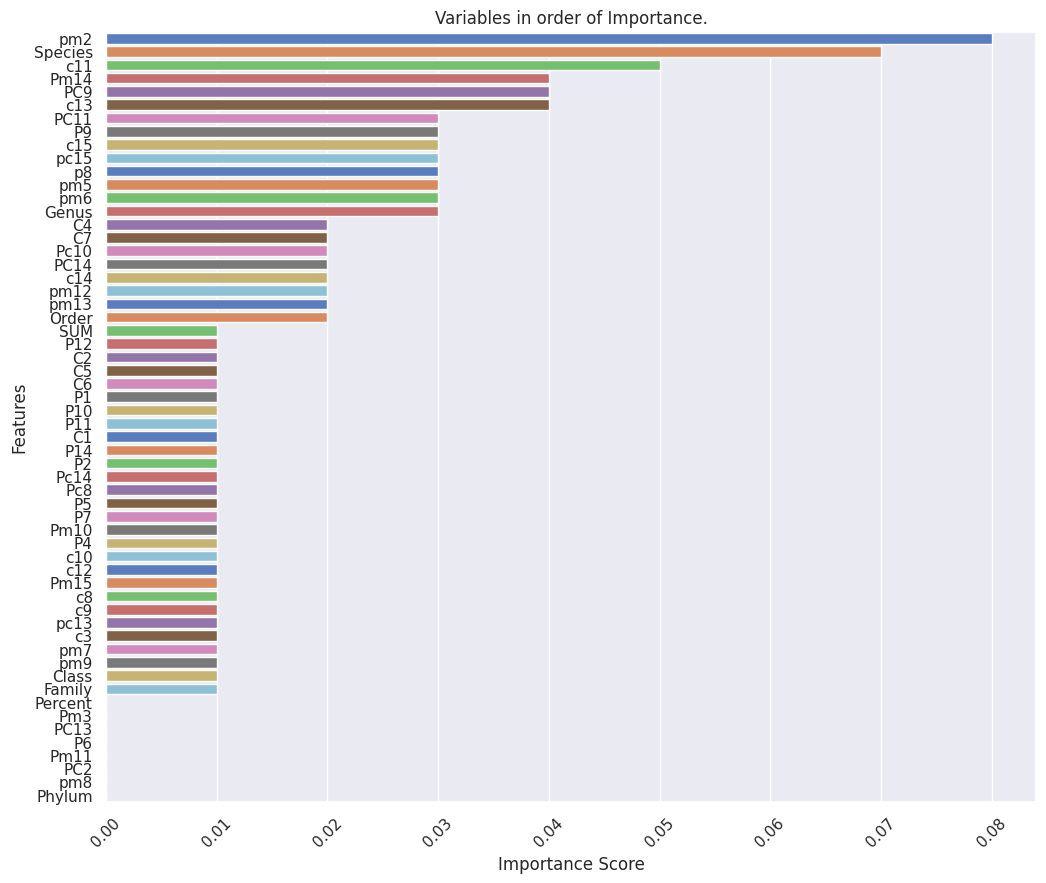

In [46]:
# import relevant libraries
from sklearn.ensemble import RandomForestRegressor

# train a machine learning model and obtain feature importances
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
importances = list(rf_model.feature_importances_)
feature_list = list(X.columns)

# plot in bar chart
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12, 10))
sns.barplot(x=[x[1] for x in feature_importances], y=[x[0] for x in feature_importances], 
            palette=sns.color_palette("muted"))
plt.xticks(rotation=45)
plt.title('Variables in order of Importance.')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

>Species is among top featues for the model

In [47]:
def get_unimportant_features(feature_importances):
    unimportant_features = []
    for feature, importance in feature_importances:
        if importance <= 0.01:
            unimportant_features.append(feature)
    return unimportant_features

In [49]:
# Train a machine learning model and obtain feature importances
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
importances = list(rf_model.feature_importances_)
feature_list = list(X.columns)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Get unimportant features
unimportant_features = get_unimportant_features(feature_importances)
print("Unimportant Features: ", unimportant_features)

Unimportant Features:  ['SUM', 'P12', 'Pm3', 'C4', 'P1', 'P10', 'C1', 'P14', 'P2', 'Pc14', 'Pc8', 'P5', 'Pc10', 'Pm10', 'P4', 'c10', 'c8', 'pc13', 'pm7', 'Class', 'Order', 'Family', 'Percent', 'C5', 'C6', 'PC13', 'P6', 'Pm11', 'PC2', 'c3', 'pm8', 'Phylum']
